In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_log_reg = pd.read_csv('new_feat_train_small.csv', index_col ='match_id_hash')
test_data =  pd.read_csv('new_feat_test_small.csv', index_col ='match_id_hash')
# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target =  pd.read_csv('/Users/m/Insight/MLcourse/Dota/targets_plus.csv', index_col='match_id_hash')
y = target['radiant_win']
#y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,r2_in_d_base,d2_in_r_base,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,0,0,0,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,0,0,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,0,0,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


In [3]:
# smaller dataset

#col_to_drop = ['r_deaths', 'd_deaths','log_chat_len','log_game_time','game_mode','lobby_type']
col_to_drop = ['log_chat_len','log_game_time','game_mode','lobby_type']
# hero_id_bool = ['r1_hero_id_bool', 'r2_hero_id_bool', 'r3_hero_id_bool',
#        'r4_hero_id_bool', 'r5_hero_id_bool', 'd1_hero_id_bool',
#        'd2_hero_id_bool', 'd3_hero_id_bool', 'd4_hero_id_bool','d5_hero_id_bool']
# col_to_drop +=hero_id_bool
data_log_reg.drop(col_to_drop,axis=1,inplace=True)


In [4]:

cat_feats = ['r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
#cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
# boolean_cols = ['boolean_r_ability_level','boolean_d_ability_level','boolean_r_kills','boolean_d_kills',
#                 'boolean_r_assists','boolean_d_assists','boolean_r_deaths','boolean_d_deaths','boolean_r_sen_placed',
#                'boolean_d_sen_placed']
# cat_feats += boolean_cols

num_feats = [col for col in data_log_reg.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(data_log_reg.columns)):
    if data_log_reg.columns[j] in num_feats:
        numerical_columns.append(j)

In [5]:
from sklearn.model_selection import train_test_split

X_log_reg = data_log_reg

X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y, test_size=0.30, random_state=150)
X_train.shape

(27772, 116)

In [6]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]
    
    

pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('logreg', LogisticRegression(C=10,penalty='l2',random_state=150))])


In [7]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2_in_d_base', 'd2_in_r_base', 'r2_in_r_ba...lty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
predicted_log_reg = pipe.predict(X_test)
print(accuracy_score(y_test, predicted_log_reg))
print(roc_auc_score(y_test,predicted_log_reg))

0.7568680164664371
0.7554775871218822


In [10]:
pred1 = pipe.fit(X_train,y_train).predict_proba(X_train)[:,1]
pred1 = pd.DataFrame({'prediction': pred1},index=X_train.index,)
y_train = pd.DataFrame({'radiant_win': y_train},index=X_train.index)
full_df_train = pd.concat([y_train,pred1,X_train],axis=1)
full_df_train.head(2)

,radiant_win,prediction,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,...,log_r_max_mana,log_d_max_mana,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
39848cb4ca858a7ef6241a8bf84d2ff1,True,0.896504,1,0,0.683185,0.900596,0,0,1,0,...,8.094894,7.809416,1.386294,0.0,0.693147,0.0,2.944439,2.772589,0.000000,0.000000
ed176a0a51906d76b113ebaf2787a17b,True,0.837707,2,1,0.400854,0.622464,0,0,0,0,...,8.179113,8.439597,0.000000,0.0,0.000000,0.0,3.610918,2.995732,1.098612,1.791759


In [11]:
full_df_train_2 = full_df_train[full_df_train['prediction']<.8].merge(full_df_train[full_df_train['prediction']>.2],on = list(full_df_train.columns.values) ,how='inner',left_index=True,right_index=True)
y_train2 = full_df_train_2['radiant_win']
X_train2 = full_df_train_2.drop(['radiant_win','prediction'],axis=1)
full_df_train_2.head(2)

,radiant_win,prediction,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,...,log_r_max_mana,log_d_max_mana,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
ab735b885109faefe1b6e7d8673a4058,False,0.581564,0,0,0.910566,0.893265,0,0,0,0,...,8.151244,8.148356,0.00000,3.433987,0.000000,2.197225,3.091042,3.526361,2.197225,0.000000
375ccade5b4bad5c8b1f3ee653f03261,False,0.224250,0,1,0.951791,0.794851,0,0,1,0,...,8.383363,8.180794,1.94591,0.000000,1.609438,0.000000,2.833213,3.555348,0.000000,0.693147


In [13]:
pipe2 = pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('logreg', LogisticRegression(C=10,penalty='l2',random_state=150))])

In [14]:
pipe2.fit(X_train2,y_train2)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2_in_d_base', 'd2_in_r_base', 'r2_in_r_ba...lty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
pipe2_predict = pipe2.predict(X_test)
print(accuracy_score(y_test, pipe2_predict))
print(roc_auc_score(y_test,pipe2_predict))

0.7546836931865916
0.7530680912789669


In [16]:
pred2 = pipe2.fit(X_train2,y_train2).predict_proba(X_train2)[:,1]
pred2 = pd.DataFrame({'prediction2': pred2},index=X_train2.index,)
y_train2 = pd.DataFrame({'radiant_win': y_train2},index=X_train2.index)
full_df_train3 = pd.concat([y_train2,pred2,X_train2],axis=1)
full_df_train3.head()

,radiant_win,prediction2,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,...,log_r_max_mana,log_d_max_mana,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
ab735b885109faefe1b6e7d8673a4058,False,0.570166,0,0,0.910566,0.893265,0,0,0,0,...,8.151244,8.148356,0.00000,3.433987,0.000000,2.197225,3.091042,3.526361,2.197225,0.000000
375ccade5b4bad5c8b1f3ee653f03261,False,0.255979,0,1,0.951791,0.794851,0,0,1,0,...,8.383363,8.180794,1.94591,0.000000,1.609438,0.000000,2.833213,3.555348,0.000000,0.693147
70ec37b596fa17dd58d631d927565837,True,0.615227,1,0,0.793800,0.864224,0,0,0,0,...,7.592714,7.892710,0.00000,1.386294,0.000000,0.693147,2.944439,2.772589,0.693147,1.609438
f604af7172535dc682097aa358de593c,True,0.679024,0,0,0.805529,0.689480,0,0,0,0,...,7.530314,7.504221,0.00000,0.000000,0.000000,0.000000,2.302585,1.098612,0.000000,0.000000
c88170b2764ec679a81c0f87320f9400,True,0.685884,0,0,0.746059,0.891432,0,0,0,0,...,7.497590,7.392457,0.00000,0.000000,0.000000,0.000000,1.609438,1.791759,0.000000,0.000000


In [18]:
full_df_train_3 = full_df_train3[full_df_train3['prediction2']<.7].merge(full_df_train3[full_df_train3['prediction2']>.3],on = list(full_df_train3.columns.values) ,how='inner',left_index=True,right_index=True)

In [20]:
y_train3 = full_df_train_3['radiant_win']
X_train3 = full_df_train_3.drop(['radiant_win','prediction2'],axis=1)

In [38]:
pipe3 = pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False,handle_unknown='ignore')))
    ])),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('logreg', LogisticRegression(C=10,penalty='l2',random_state=150))])

In [39]:
pipe3.fit(X_train3,y_train3)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2_in_d_base', 'd2_in_r_base', 'r2_in_r_ba...lty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
def select_cols_n_distinct(data,min,max):
    '''select columns in data frame with number of 
    distinct values between min and max, inclusive'''
    cols = []
    for col in data.columns.values:
        unique_vals = data[col].value_counts().shape[0]
        if unique_vals >= min and unique_vals <= max:
            #cols.append((col,unique_vals))
            cols.append(col)
    return cols    

In [45]:
y_train3 = y_train3.apply(lambda x: int(x))
y_test = y_test.apply(lambda x: int(x))

In [49]:
pipe3_predict = pipe3.predict(X_test)
print(accuracy_score(y_test, pipe3_predict))
print(roc_auc_score(y_test,pipe3_predict))

0.7532554818113081
0.7518094746152485


In [50]:
pred3 = pipe3.fit(X_train3,y_train3).predict_proba(X_train3)[:,1]
pred3 = pd.DataFrame({'prediction3': pred3},index=X_train3.index,)
y_train3 = pd.DataFrame({'radiant_win': y_train3},index=X_train3.index)
full_df_train4 = pd.concat([y_train3,pred3,X_train3],axis=1)
full_df_train4.head()

,radiant_win,prediction3,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,...,log_r_max_mana,log_d_max_mana,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
ab735b885109faefe1b6e7d8673a4058,0,0.584521,0,0,0.910566,0.893265,0,0,0,0,...,8.151244,8.148356,0.000000,3.433987,0.000000,2.197225,3.091042,3.526361,2.197225,0.000000
70ec37b596fa17dd58d631d927565837,1,0.628992,1,0,0.793800,0.864224,0,0,0,0,...,7.592714,7.892710,0.000000,1.386294,0.000000,0.693147,2.944439,2.772589,0.693147,1.609438
f604af7172535dc682097aa358de593c,1,0.686155,0,0,0.805529,0.689480,0,0,0,0,...,7.530314,7.504221,0.000000,0.000000,0.000000,0.000000,2.302585,1.098612,0.000000,0.000000
c88170b2764ec679a81c0f87320f9400,1,0.685401,0,0,0.746059,0.891432,0,0,0,0,...,7.497590,7.392457,0.000000,0.000000,0.000000,0.000000,1.609438,1.791759,0.000000,0.000000
e8f92e7893606234a57dfa810e16ddcd,0,0.525122,0,0,0.817878,0.862109,0,0,0,0,...,8.014894,7.957769,1.386294,1.791759,0.693147,1.098612,2.772589,2.944439,1.098612,1.386294


In [54]:
full_df_train_4 = full_df_train4[full_df_train4['prediction3']<.6].merge(full_df_train4[full_df_train4['prediction3']>.4],on = list(full_df_train4.columns.values) ,how='inner',left_index=True,right_index=True)

In [55]:
y_train4 = full_df_train_4['radiant_win']
X_train4 = full_df_train_4.drop(['radiant_win','prediction3'],axis=1)

In [56]:
y_train4.shape

(5998,)

In [57]:
pipe4 = pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False,handle_unknown='ignore')))
    ])),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('logreg', LogisticRegression(C=10,penalty='l2',random_state=150))])

In [58]:
pipe4.fit(X_train4,y_train4)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2_in_d_base', 'd2_in_r_base', 'r2_in_r_ba...lty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [59]:
pipe4_predict = pipe4.predict(X_test)
print(accuracy_score(y_test, pipe4_predict))
print(roc_auc_score(y_test,pipe4_predict))

0.7493068974208182
0.74793964266761


In [61]:
pred4 = pipe4.fit(X_train4,y_train4).predict_proba(X_train4)[:,1]
pred4 = pd.DataFrame({'prediction4': pred4},index=X_train4.index,)
y_train4 = pd.DataFrame({'radiant_win': y_train4},index=X_train4.index)
full_df_train5 = pd.concat([y_train4,pred4,X_train4],axis=1)
full_df_train5.head()

,radiant_win,prediction4,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,...,log_r_max_mana,log_d_max_mana,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
ab735b885109faefe1b6e7d8673a4058,0,0.585941,0,0,0.910566,0.893265,0,0,0,0,...,8.151244,8.148356,0.000000,3.433987,0.000000,2.197225,3.091042,3.526361,2.197225,0.000000
e8f92e7893606234a57dfa810e16ddcd,0,0.408532,0,0,0.817878,0.862109,0,0,0,0,...,8.014894,7.957769,1.386294,1.791759,0.693147,1.098612,2.772589,2.944439,1.098612,1.386294
4fe850734418e35a3e22f688e766eb0c,1,0.504321,0,1,0.794678,0.596851,0,0,0,1,...,7.574399,7.463759,1.386294,1.098612,0.693147,0.693147,1.386294,1.791759,0.693147,0.000000
42024891790bf200fdb4503c26e83970,0,0.543091,0,0,0.874419,0.895201,0,0,0,0,...,7.414386,7.407130,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612,0.000000,0.000000
7e750ed89f6bafe9e2a5dea4a1336399,1,0.557957,0,0,0.948833,0.625566,0,0,0,0,...,7.385039,7.562000,1.098612,1.098612,0.693147,0.693147,2.302585,1.791759,0.693147,1.098612


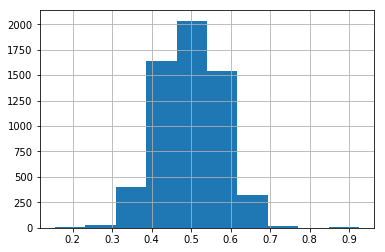

In [65]:
full_df_train5['prediction4'].hist()

In [66]:
test_data =  pd.read_csv('new_feat_test_small.csv', index_col ='match_id_hash')
test_data.drop(col_to_drop,axis=1,inplace=True)
test_data.shape

(10000, 116)

In [141]:
X_sub = test_data
y_test_pred = pipe.predict_proba(X_sub)[:, 1]
y_test_pred
y_test_pred = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

In [142]:
for i in range(0,y_test_pred.shape[0]):
    if 0.2 < y_test_pred['radiant_win_prob'].iloc[i] < 0.8 :
        try:
            y_test_pred['radiant_win_prob'].iloc[i] = pipe2.predict_proba(X_sub.iloc[i:i+2,:])[:,1][0]
        except:
            pass

In [144]:
y_test_pred;

In [145]:
for i in range(0,y_test_pred.shape[0]):
    if 0.3 < y_test_pred['radiant_win_prob'].iloc[i] < 0.7 :
        try:
            y_test_pred['radiant_win_prob'].iloc[i] = pipe3.predict_proba(X_sub.iloc[i:i+2,:])[:,1][0]
        except:
            pass

In [146]:
for i in range(0,y_test_pred.shape[0]):
    if 0.4 < y_test_pred['radiant_win_prob'].iloc[i] < 0.6:
        try:
            y_test_pred['radiant_win_prob'].iloc[i] = pipe4.predict_proba(X_sub.iloc[i:i+2,:])[:,1][0]
        except:
            pass

In [152]:
y_test_pred.index;

In [153]:
#df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)
df_submission = y_test_pred
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-17_16-26-28.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.339769
70e5ba30f367cea48793b9003fab9d38,0.958916
4d9ef74d3a2025d79e9423105fd73d41,0.917205
2bb79e0c1eaac1608e5a09c8e0c6a555,0.888145
bec17f099b01d67edc82dfb5ce735a43,0.189945
038acbb47d9eb54c11962d07cce8d829,0.143063
b891f03bb2a86d78b84043437fc95e04,0.933808
ff898afdb5bb5c7163bde45a009503f7,0.104152
72e6b1c31c718c0806f9aaeb8b7290a9,0.478643


In [43]:
df_submission.shape

(10000, 1)